## Init

In [1]:
%config InlineBackend.figure_format='retina'

import os

import cv2
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)

In [2]:
def visualize(**images):
    """Plots images in one row"""
    n = len(images)

    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

## Reading:

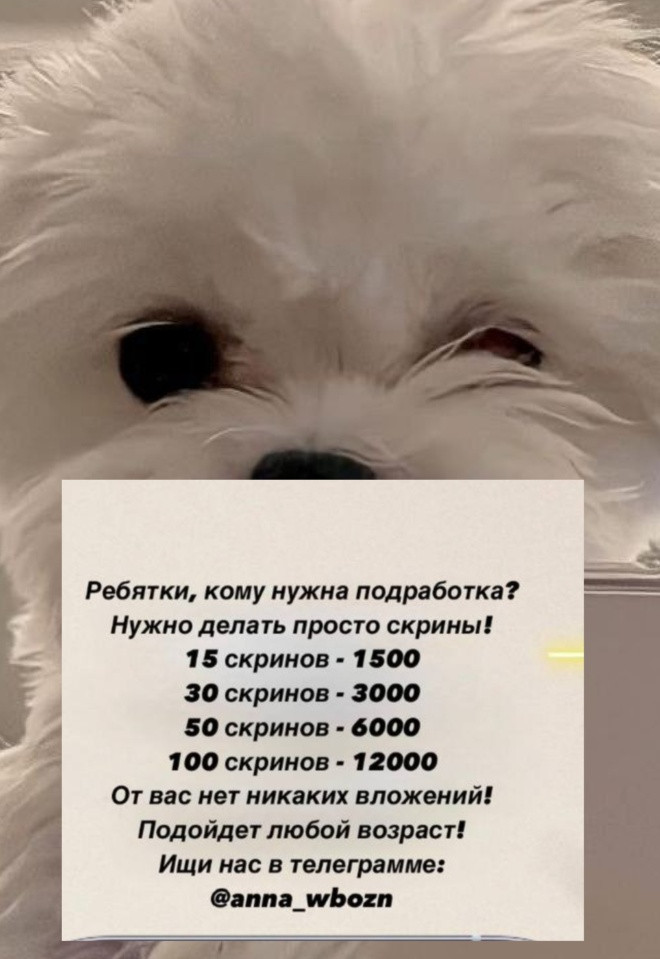

In [3]:
Image.open("test_frod.jpg")

In [4]:
img = cv2.imread("test_frod.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

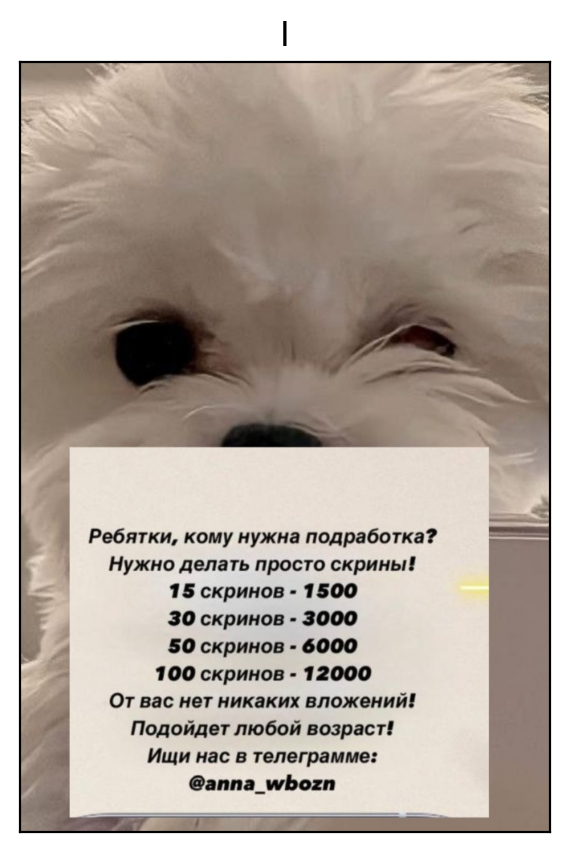

In [5]:
visualize(i=img)

## OCR:

### pytesseract

iy
;
se
-
.
—
~
Fa
=
4
-
»
S
Pe6aTKu,
komy
Hy>kKHa
NogpaboTKa?
Hy>kHo
4enaTb
npocto
cKpuHbi!
~
15
cxpnuos
-
1500
a
|
30
ckpuHos
-
3000
50
cxpunos
-
6000
er
100
cxpuHos
-
12000
OT
Bac
HeT
HUKaKHXx
BNOxKeHUHE
Nogovgert
nto60u
Bospact!
Yun
Hac
B
Tenerpamme:
y
@anna_wbozn


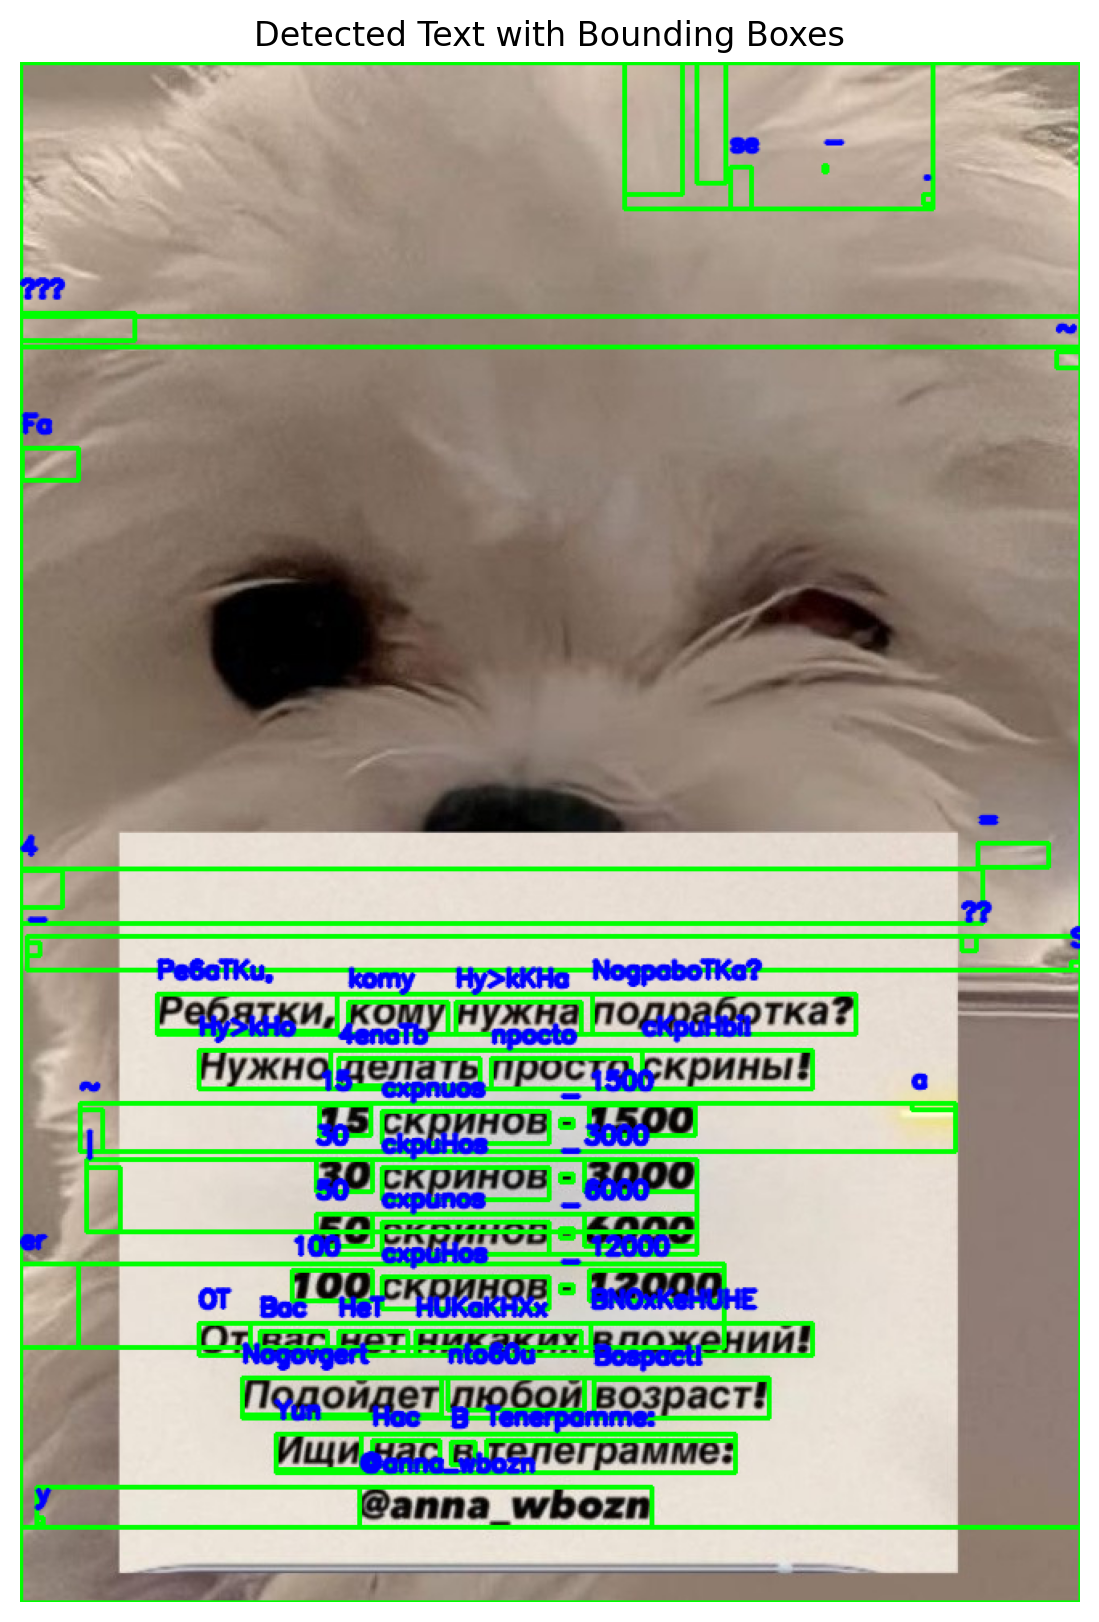

In [6]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("test_frod.jpg")

# Convert the image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use Tesseract to do OCR on the image with both Russian and English languages
custom_config = r'--oem 3 --psm 6'
d = pytesseract.image_to_data(img_rgb, output_type=Output.DICT, config=custom_config, lang='eng+rus')

# Number of detected boxes
n_boxes = len(d['level'])

# Draw bounding boxes and print text
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    img_rgb = cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    text = d['text'][i]
    if text.strip() != "":
        img_rgb = cv2.putText(img_rgb, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
        print(text)

# Show the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Detected Text with Bounding Boxes')
plt.axis('off')
plt.show()

## EasyOCR:

In [7]:
!pip show easyocr

Name: easyocr
Version: 1.7.1
Summary: End-to-End Multi-Lingual Optical Character Recognition (OCR) Solution
Home-page: https://github.com/jaidedai/easyocr
Author: Rakpong Kittinaradorn
Author-email: r.kittinaradorn@gmail.com
License: Apache License 2.0
Location: /Users/alexander/miniconda3/lib/python3.12/site-packages
Requires: ninja, numpy, opencv-python-headless, Pillow, pyclipper, python-bidi, PyYAML, scikit-image, scipy, Shapely, torch, torchvision
Required-by: 


Ребятки, кому нужна подработка?
Нужно делать просто скрины!
15 скринов
1500
30 скринов
3000
50 скринов
6000
100 скринов
12000
От вас нет никаких вложений!
Подойдет любой возраст!
Ищи нас в телеграмме:
@anna_wbozn


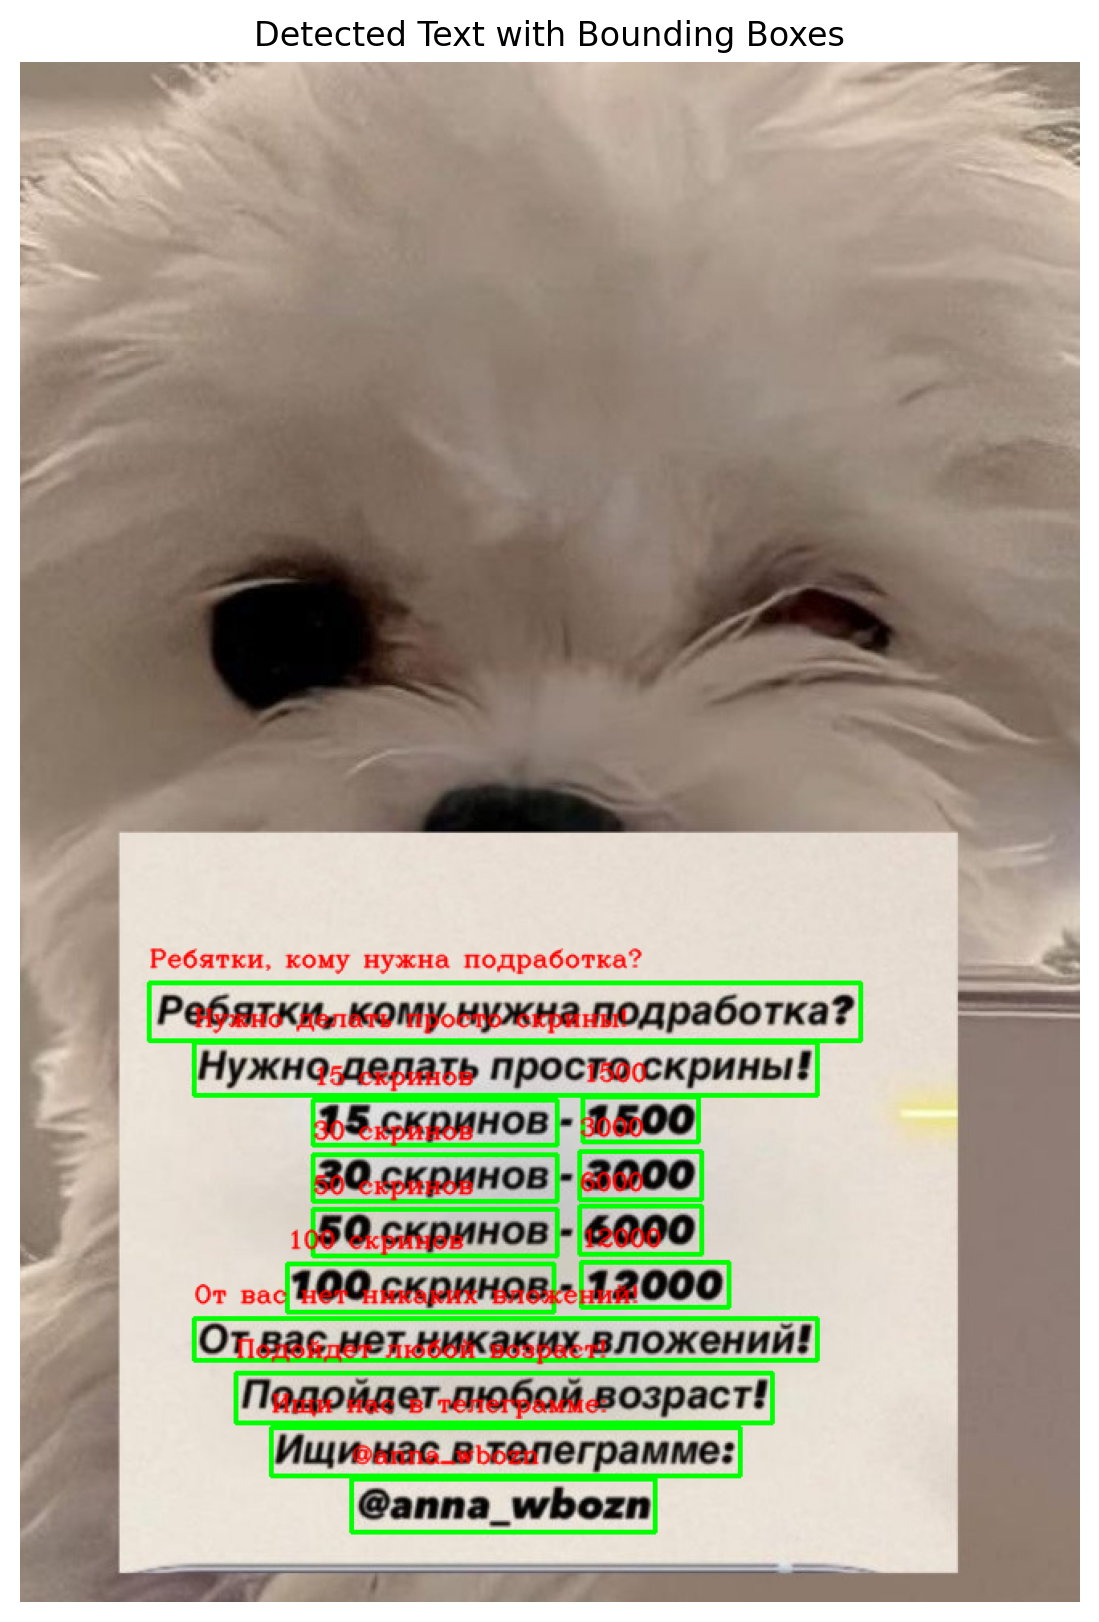

In [8]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader with English and Russian languages
reader = easyocr.Reader(['en', 'ru'])

# Read the image
img = cv2.imread("test_frod.jpg")

# Detect text in the image
result = reader.readtext(img)

# Convert the image to RGB for visualization with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes and print text
for (bbox, text, prob) in result:
    # Extract the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    
    # Draw the bounding box
    img_rgb = cv2.rectangle(img_rgb, top_left, bottom_right, (0, 255, 0), 2)
    
    # Annotate the image with the detected text
    img_rgb = cv2.putText(
        img_rgb, text, (top_left[0], top_left[1] - 10), 
        cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA,
    )
    
    # Print the detected text
    print(text)

# Show the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Detected Text with Bounding Boxes')
plt.axis('off')
plt.show()


## PaddleOCR:

In [13]:
PaddleOCR?

Init signature: PaddleOCR(**kwargs)
Docstring:      <no docstring>
Init docstring:
paddleocr package
args:
    **kwargs: other params show in paddleocr --help
File:           ~/miniconda3/lib/python3.12/site-packages/paddleocr/paddleocr.py
Type:           type
Subclasses:     

[2024/07/03 15:26:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/alexander/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/alexander/.paddleocr/whl/rec/cyrillic/cyrillic_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num

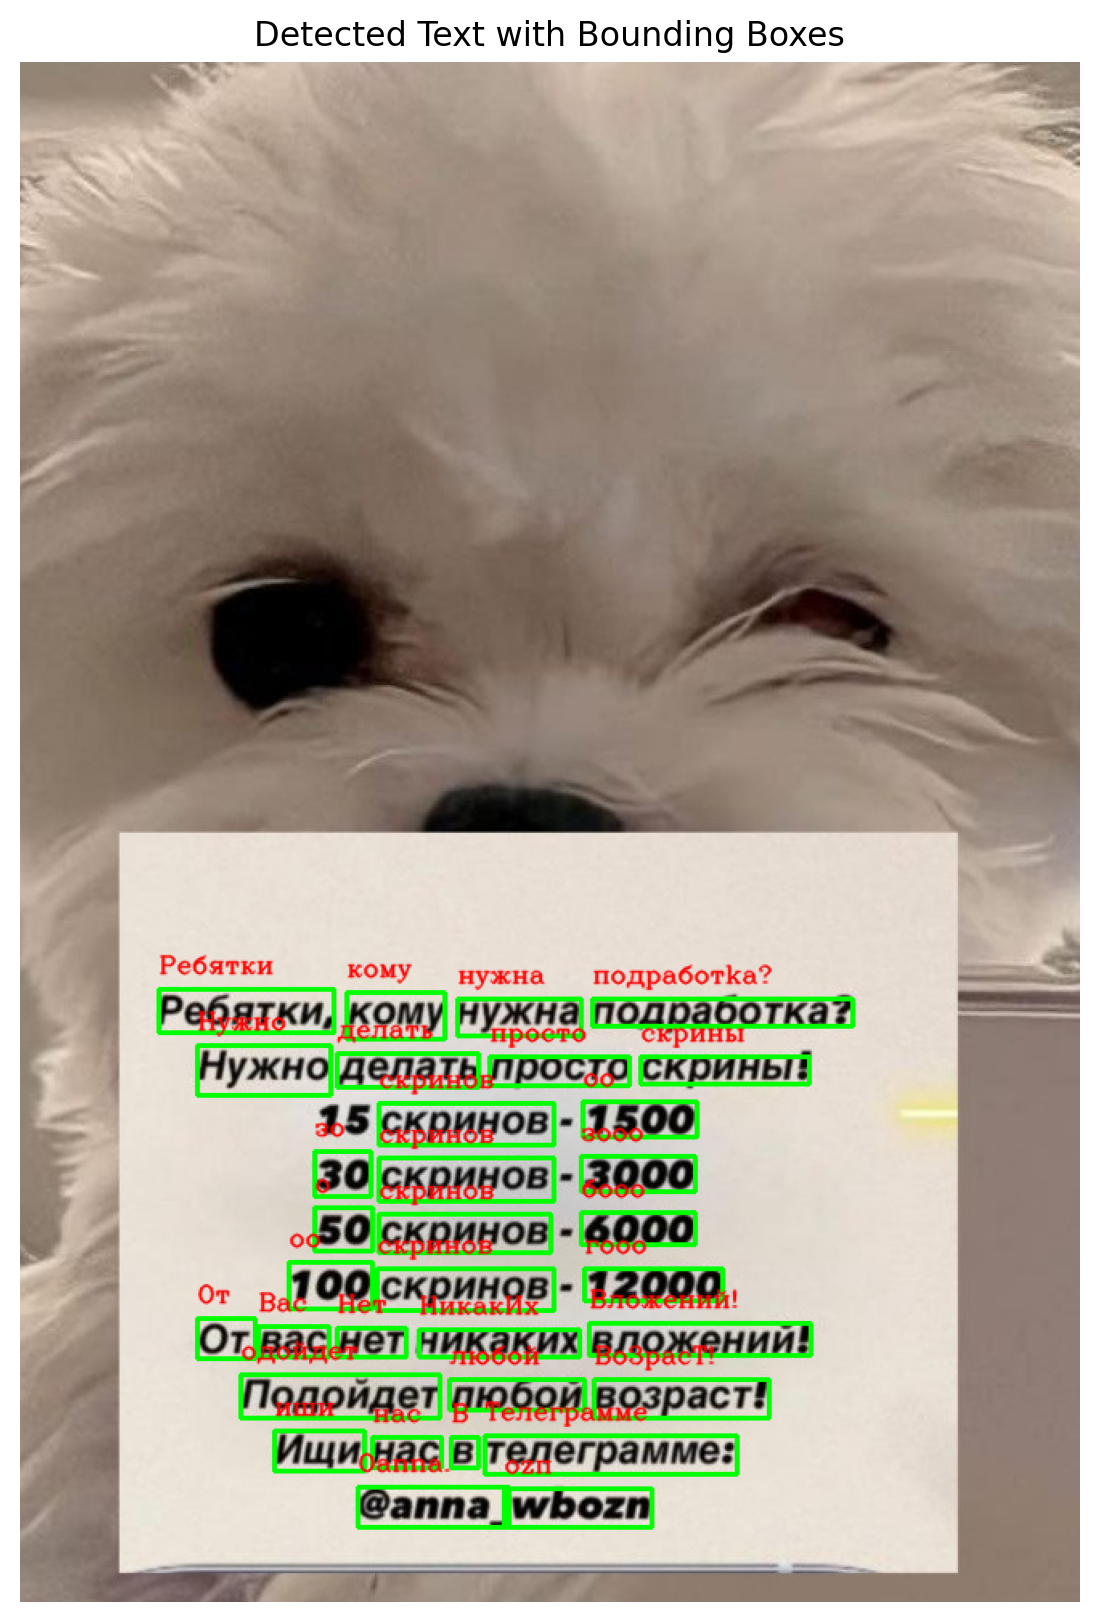

In [17]:
import cv2
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt

# Initialize the PaddleOCR reader with English and Russian languages
ocr = PaddleOCR(lang='cyrillic', use_angle_cls=True)

# Read the image
img = cv2.imread("test_frod.jpg")

# Detect text in the image
result = ocr.ocr(img)

# Convert the image to RGB for visualization with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes and print text
for line in result:
    for word in line:
        bbox, (text, prob) = word
        # Extract the bounding box coordinates
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        
        # Draw the bounding box
        img_rgb = cv2.rectangle(img_rgb, top_left, bottom_right, (0, 255, 0), 2)
        
        # Annotate the image with the detected text
        img_rgb = cv2.putText(
            img_rgb, text, (top_left[0], top_left[1] - 10), 
            cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA,
        )
        
        # Print the detected text
        print(text)

# Show the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Detected Text with Bounding Boxes')
plt.axis('off')
plt.show()


In [16]:
line

[[[[86.0, 577.0], [196.0, 582.0], [195.0, 604.0], [85.0, 599.0]],
  ('Pебятки', 0.8534225821495056)],
 [[[203.0, 579.0], [266.0, 583.0], [264.0, 608.0], [202.0, 604.0]],
  ('кому', 0.7791188359260559)],
 [[[272.0, 583.0], [349.0, 583.0], [349.0, 606.0], [272.0, 606.0]],
  ('нужна', 0.9929044842720032)],
 [[[356.0, 583.0], [517.0, 579.0], [518.0, 600.0], [357.0, 604.0]],
  ('подpаботkа?', 0.789992094039917)],
 [[[110.0, 612.0], [194.0, 615.0], [193.0, 643.0], [109.0, 640.0]],
  ('Нужно', 0.8658855557441711)],
 [[[197.0, 617.0], [285.0, 617.0], [285.0, 638.0], [197.0, 638.0]],
  ('делать', 0.9978668689727783)],
 [[[292.0, 619.0], [379.0, 616.0], [379.0, 637.0], [293.0, 640.0]],
  ('просто', 0.9485156536102295)],
 [[[386.0, 619.0], [491.0, 615.0], [491.0, 636.0], [386.0, 640.0]],
  ('скрины', 0.9047892689704895)],
 [[[223.0, 648.0], [332.0, 650.0], [332.0, 674.0], [223.0, 672.0]],
  ('скринов', 0.9996347427368164)],
 [[[350.0, 647.0], [420.0, 644.0], [421.0, 669.0], [351.0, 672.0]],
  ('о